In [ ]:
from tensorflow.keras.datasets import cifar100

# Load CIFAR-100 dataset
(train_images, _), (test_images, _) = cifar100.load_data(label_mode='fine')

# Normalize the pixel values (0 to 1)
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

print(f"Training data shape: {train_images.shape}")
print(f"Testing data shape: {test_images.shape}")

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Dense, Flatten, Reshape, Input, BatchNormalization

# Improved Encoder
input_layer = Input(shape=(32, 32, 3))
x = Conv2D(32, (3, 3), strides=2, activation='relu', padding='same')(input_layer)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), strides=2, activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu', padding='same')(x)
x = Flatten()(x)
encoded = Dense(256, activation='relu')(x)

# Improved Decoder
x = Dense(4 * 4 * 128, activation='relu')(encoded)
x = Reshape((4, 4, 128))(x)
x = Conv2DTranspose(128, (3, 3), strides=2, activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2DTranspose(64, (3, 3), strides=2, activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding='same')(x)
decoded = Conv2DTranspose(3, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 16, 16, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2048)                │         526,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 16, 16, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 32, 32, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (None, 32, 32, 3)           │             867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,385,987 (5.29 MB)

 Trainable params: 1,385,411 (5.28 MB)

 Non-trainable params: 576 (2.25 KB)

In [ ]:
pip install tensorflow-model-optimization

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 15.1 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf

# SSIM-based loss function
def ssim_loss(y_true, y_pred):
    return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, max_val=1.0))

# Compile the model
autoencoder.compile(optimizer='adam', loss=ssim_loss)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

In [ ]:
history = autoencoder.fit(
    train_images, train_images,
    epochs=50,
    batch_size=64,
    validation_data=(test_images, test_images),
    shuffle=True,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 20ms/step - loss: 0.7121 - val_loss: 0.3175 - learning_rate: 0.0010
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - loss: 0.2831 - val_loss: 0.2484 - learning_rate: 0.0010
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.2312 - val_loss: 0.2289 - learning_rate: 0.0010
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.2048 - val_loss: 0.2066 - learning_rate: 0.0010
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.1862 - val_loss: 0.1860 - learning_rate: 0.0010
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.1755 - val_loss: 0.1737 - learning_rate: 0.0010
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.1679 - val_loss: 0.1669 - learning_rate: 0.0010
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.1612 - val_loss: 0.1668 - learning_rate: 0.0010
Epoch 9/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.1574 - val_loss: 0.1586 - learning_rate: 0.0010
Epoc

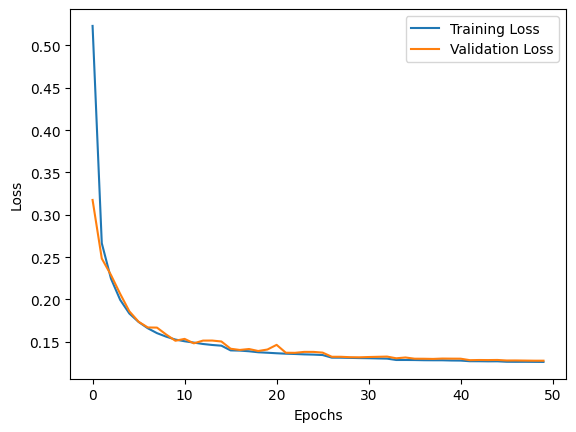

In [ ]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


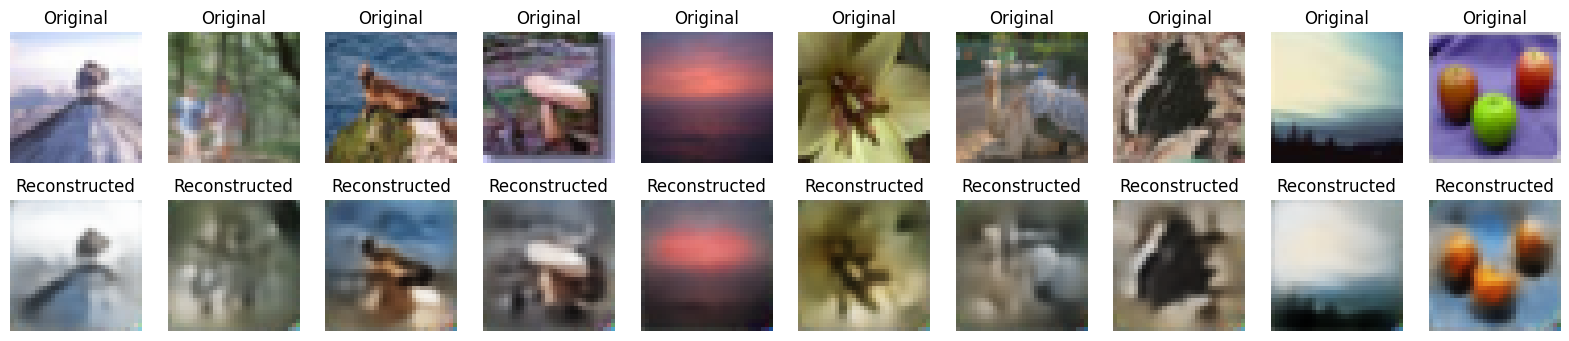

In [ ]:
n = 10  # Number of images to display
random_test_images = test_images[:n]

# Encode and decode images
reconstructed_images = autoencoder.predict(random_test_images)

# Display original and reconstructed images
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    plt.subplot(2, n, i + 1)
    plt.imshow(random_test_images[i])
    plt.title("Original")
    plt.axis('off')

    # Reconstructed images
    plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i])
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()

In [ ]:
import numpy as np

# Mean Squared Error (MSE)
mse = np.mean((random_test_images - reconstructed_images) ** 2)
print(f"Mean Squared Error (MSE): {mse}")

# Structural Similarity Index (SSIM)
ssim_values = tf.image.ssim(random_test_images, reconstructed_images, max_val=1.0)
print(f"Average SSIM: {np.mean(ssim_values)}")

Mean Squared Error (MSE): 0.0072432770393788815
Average SSIM: 0.8797174692153931


In [ ]:
# Save the trained autoencoder model
autoencoder.save('improved_cifar100_autoencoder.h5')

In [ ]:
import math

def psnr(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    max_pixel = 1.0  # Since normalized [0, 1]
    psnr_value = 10 * math.log10(max_pixel ** 2 / mse)
    return psnr_value

# Calculate PSNR
psnr_value = psnr(random_test_images, reconstructed_images)
print(f"PSNR: {psnr_value} dB")

PSNR: 21.400649036750863 dB


In [ ]:
# Create an encoder-only model to get latent features
encoder_model = Model(inputs=autoencoder.input, outputs=autoencoder.layers[-6].output)  # -6 corresponds to the Dense(256)
latent_representations = encoder_model.predict(train_images)
print(f"Latent space shape: {latent_representations.shape}")  # Should be (num_samples, latent_dim)

latent_representations_flattened = latent_representations.reshape(latent_representations.shape[0], -1)
print(f"Flattened Latent Shape: {latent_representations_flattened.shape}")  # Should be (num_samples, latent_dim)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
Latent space shape: (50000, 8, 8, 128)
Flattened Latent Shape: (50000, 8192)


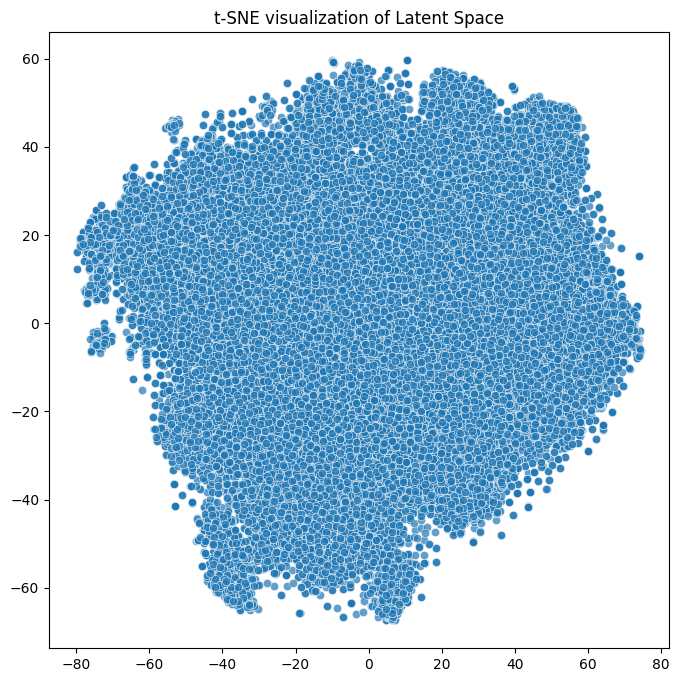

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Apply t-SNE to reduce to 2D
tsne = TSNE(n_components=2, random_state=0)
tsne_result = tsne.fit_transform(latent_representations_flattened)

# Plot t-SNE
plt.figure(figsize=(8, 8))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], alpha=0.7)
plt.title("t-SNE visualization of Latent Space")
plt.show()